<a href="https://colab.research.google.com/github/valquero779/Inteligencia-Artifcial/blob/main/TrabajoDeLatidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install wfdb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 5.1 MB/s 


In [3]:
import wfdb
pepito=wfdb.rdrecord("database/100")
print(pepito)
print(pepito.p_signal)

[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]


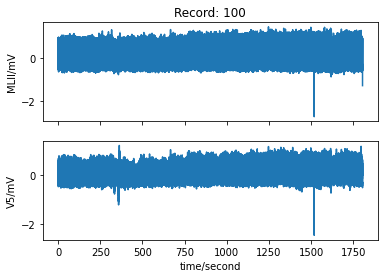

In [4]:

wfdb.plot_wfdb(pepito)

In [5]:
signals=pepito.p_signal
print(signals)
print(len(signals))

print(signals[21])
print(signals[21,1])


[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]
650000
[-0.18  -0.055]
-0.055


In [6]:
anotaciones=wfdb.rdann("database/103","atr").sample

#for i in anotaciones:
  #print(i)  
print(anotaciones)
print(anotaciones[0])
print(anotaciones[-1])
print(len(anotaciones)) #cantidad de latidos totales del registro en los 1800 segundos 

[    21    265    575 ... 649195 649534 649875]
21
649875
2091


In [7]:
signals1=signals[:,0]
Vboser=signals1[anotaciones[1]-70:anotaciones[1]+70] #anotaciones me da la posicion del latido, y signals me da los datos del latido que vamos a manejar
print(Vboser)
#si el dato se interpone con un latido, se hace +-140
#N minimo = 50 mili segundos   361 latidos en 1 seg

[-0.29  -0.295 -0.29  -0.285 -0.275 -0.255 -0.25  -0.25  -0.265 -0.255
 -0.245 -0.23  -0.245 -0.245 -0.255 -0.255 -0.24  -0.25  -0.255 -0.245
 -0.255 -0.25  -0.25  -0.265 -0.26  -0.26  -0.265 -0.27  -0.265 -0.26
 -0.275 -0.28  -0.29  -0.275 -0.27  -0.26  -0.28  -0.28  -0.285 -0.275
 -0.275 -0.265 -0.27  -0.285 -0.29  -0.28  -0.275 -0.285 -0.28  -0.3
 -0.3   -0.305 -0.295 -0.3   -0.31  -0.31  -0.305 -0.295 -0.285 -0.285
 -0.29  -0.295 -0.31  -0.29  -0.295 -0.3   -0.305 -0.31  -0.325 -0.31
 -0.3   -0.29  -0.31  -0.325 -0.33  -0.315 -0.3   -0.305 -0.31  -0.32
 -0.33  -0.325 -0.315 -0.31  -0.305 -0.305 -0.31  -0.3   -0.305 -0.29
 -0.3   -0.3   -0.305 -0.305 -0.29  -0.28  -0.295 -0.305 -0.315 -0.305
 -0.295 -0.29  -0.28  -0.27  -0.275 -0.275 -0.27  -0.25  -0.25  -0.255
 -0.225 -0.22  -0.205 -0.2   -0.205 -0.215 -0.23  -0.22  -0.225 -0.225
 -0.225 -0.23  -0.235 -0.24  -0.235 -0.22  -0.21  -0.205 -0.245 -0.285
 -0.285 -0.3   -0.31  -0.33  -0.33  -0.325 -0.315 -0.32  -0.315 -0.325]


In [8]:
#En 1 seg hay 361 latidos, entonces en 0.09seg hay 32 latidos

ListaVboser=[]
signals1=signals[:,0]
for i in anotaciones:
  
  Vboser=0

  if i==649875:
    Vboser=signals1[i-32:]
  else:
    Vboser=signals1[i-16:i+16]
  ListaVboser.append(Vboser)

print(ListaVboser)

[array([-0.145, -0.145, -0.145, -0.12 , -0.135, -0.145, -0.15 , -0.16 ,
       -0.155, -0.16 , -0.175, -0.18 , -0.185, -0.17 , -0.155, -0.175,
       -0.18 , -0.19 , -0.18 , -0.155, -0.135, -0.155, -0.19 , -0.205,
       -0.235, -0.225, -0.245, -0.25 , -0.26 , -0.275, -0.275, -0.275]), array([-0.31 , -0.31 , -0.305, -0.295, -0.285, -0.285, -0.29 , -0.295,
       -0.31 , -0.29 , -0.295, -0.3  , -0.305, -0.31 , -0.325, -0.31 ,
       -0.3  , -0.29 , -0.31 , -0.325, -0.33 , -0.315, -0.3  , -0.305,
       -0.31 , -0.32 , -0.33 , -0.325, -0.315, -0.31 , -0.305, -0.305]), array([-0.35 , -0.34 , -0.345, -0.345, -0.345, -0.345, -0.33 , -0.33 ,
       -0.335, -0.345, -0.35 , -0.35 , -0.34 , -0.33 , -0.345, -0.345,
       -0.355, -0.35 , -0.34 , -0.33 , -0.34 , -0.34 , -0.34 , -0.33 ,
       -0.335, -0.33 , -0.335, -0.345, -0.345, -0.34 , -0.33 , -0.315]), array([-0.355, -0.36 , -0.36 , -0.37 , -0.36 , -0.345, -0.355, -0.345,
       -0.345, -0.345, -0.34 , -0.31 , -0.305, -0.305, -0.31 , -0.305,

In [9]:
import random

ListaNoVboser=[]
signals1=signals[:,0]
for i in range(0,len(anotaciones)):

  Vboser=0
  
  if anotaciones[i]==649875:
    continue
  else: 
    try:
      print(i)
      for j in range(0,3):

        #print(anotaciones[i])
        #print(anotaciones[i+1])
        posicionAleatoria=random.randint(anotaciones[i]+30, anotaciones[i+1]-30)
        
        Vboser=signals1[posicionAleatoria-16:posicionAleatoria+16]
        ListaNoVboser.append(Vboser)
    except:
      continue
print(ListaNoVboser)

Streaming output truncated to the last 5000 lines.
       -0.35 , -0.365, -0.355, -0.35 , -0.335, -0.34 , -0.335, -0.33 ,
       -0.315, -0.305, -0.29 , -0.285, -0.28 , -0.27 , -0.26 , -0.235]), array([-0.29 , -0.275, -0.27 , -0.27 , -0.28 , -0.29 , -0.295, -0.27 ,
       -0.27 , -0.27 , -0.285, -0.3  , -0.32 , -0.355, -0.395, -0.425,
       -0.46 , -0.505, -0.49 , -0.39 , -0.21 , -0.02 ,  0.17 ,  0.415,
        0.73 ,  1.005,  1.17 ,  1.2  ,  1.07 ,  0.745,  0.31 , -0.06 ]), array([-0.055,  0.145,  0.42 ,  0.705,  0.915,  0.995,  0.88 ,  0.56 ,
        0.135, -0.225, -0.42 , -0.44 , -0.42 , -0.38 , -0.37 , -0.355,
       -0.355, -0.345, -0.34 , -0.35 , -0.36 , -0.355, -0.35 , -0.345,
       -0.35 , -0.375, -0.385, -0.36 , -0.35 , -0.335, -0.335, -0.355]), array([-0.335, -0.33 , -0.315, -0.31 , -0.325, -0.34 , -0.35 , -0.34 ,
       -0.33 , -0.32 , -0.33 , -0.335, -0.36 , -0.36 , -0.34 , -0.32 ,
       -0.33 , -0.35 , -0.36 , -0.365, -0.35 , -0.335, -0.325, -0.335,
       -0.345, -0.34

In [10]:
import numpy as np
import statistics
condicion=False
inicio=0
final=15
signals1=signals[:,0]

listaMedias=[]
listaDesviacion=[]
while(condicion!=True):

    lista=signals1[inicio:final]
    
    if final>=650000:
      while  len(lista)<=7:
        print("LLegue")
        lista = np.append(lista, 25)
        print(len(lista))
      condicion=True

    
        
        

    media=np.mean(lista)
    desviacion=statistics.pstdev(lista)
  

    if inicio==0:
      for i in range(0,15):
        listaMedias.append(media)
        listaDesviacion.append(desviacion)
    else:
      for i in range(0,7):
        listaMedias.append(media)
        listaDesviacion.append(desviacion)

   
    inicio+=7
    final+=7
print(len(listaDesviacion),len(listaMedias))


650000 650000


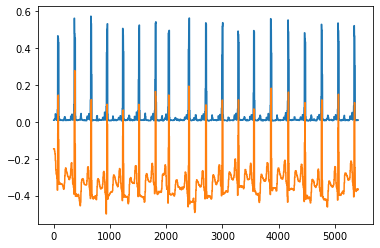

In [11]:

import matplotlib.pyplot as plt
plt.plot(listaDesviacion[:5415])
plt.plot(listaMedias[:5415])